# Zadanie 1: analiza danych sprzedaży

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dane/sales.csv',parse_dates=['order_date'])

In [4]:
df.head(5)

,order_id,product_name,category,price,quantity,order_date
0,1102,Smartphone,Electronics,700.22,2,2023-01-01
1,1435,Speaker,Accessories,1491.96,1,2023-01-02
2,1860,Headphones,Electronics,305.09,2,2023-01-03
3,1270,Charger,Accessories,76.21,1,2023-01-04
4,1106,Mouse,Accessories,766.15,2,2023-01-05


In [6]:
df['revenue'] = df['price']*df['quantity']

In [7]:
#łączny przychód ze sprzedaży dla każdego produktu
product_revenue = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False)

In [9]:
print("pięć najlepiej zarabiających produktów:")
product_revenue.head(5)

pięć najlepiej zarabiających produktów:


product_name
Webcam 29425.50
Mouse 27737.84
Speaker 25987.32
Charger 21029.31
Laptop 20494.80
Name: revenue, dtype: float64

In [11]:
#średnia wartość zamówienie w każdym miesiącu
df['month'] = df['order_date'].dt.to_period('M')
monthly_avg_order_value = df.groupby('month')['revenue'].mean()

In [12]:
print("średnia wartość zamówienia w miesiącu:")
print(monthly_avg_order_value)

średnia wartość zamówienia w miesiącu:
month
2023-01    1765.235161
2023-02    1879.211786
2023-03    1731.776129
2023-04    2698.689000
Freq: M, Name: revenue, dtype: float64


In [13]:
#10 najlepiej sorzedających się kategorii
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False).head(10)

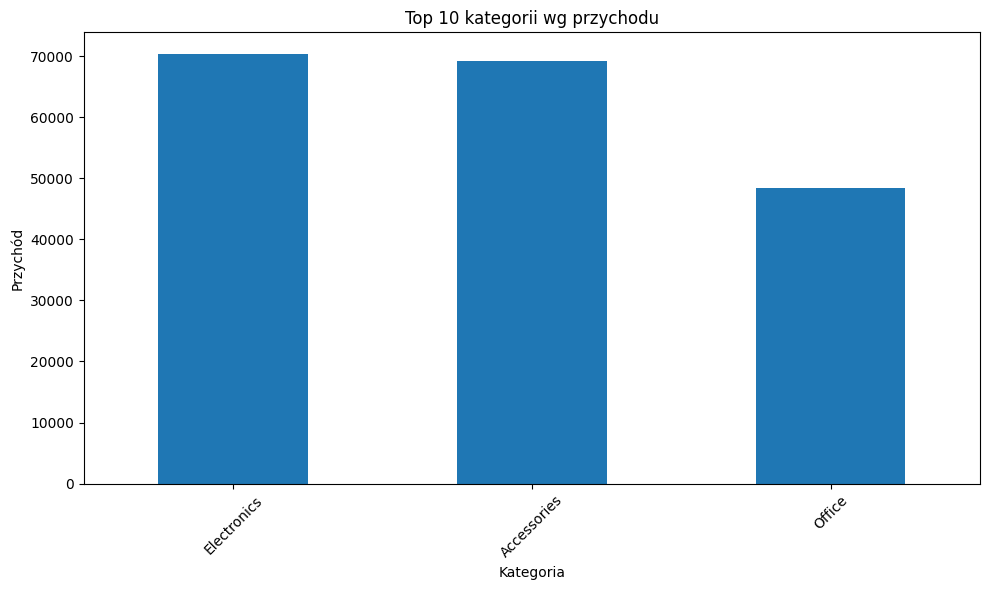

In [14]:
plt.figure(figsize=(10,6))
category_revenue.plot(kind='bar')
plt.title("Top 10 kategorii wg przychodu")
plt.xlabel('Kategoria')
plt.ylabel('Przychód')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Zadanie 2: Analiza czasu pracy pracowników

In [15]:
#wczytywanie danych
df = pd.read_csv('dane/timesheet.csv',parse_dates=['entry_time','exit_time'])

In [16]:
#obliczenie czasu pracy
df['work_time'] = df['exit_time'] - df['entry_time']
df['work_hours'] = df['work_time'].dt.total_seconds()/3600

In [18]:
#średni czas pracy dziennie dla kązdego pracownika
avg_hours_per_employee = df.groupby('employee_id')['work_hours'].mean().sort_values(ascending=False)

In [19]:
print("średni czas pracy dziennie dla kązdego pracownika:")
print(avg_hours_per_employee)

średni czas pracy dziennie dla kązdego pracownika:
employee_id
1     8.633333
8     8.558333
5     8.450000
2     8.441667
6     8.350000
9     8.183333
10    8.166667
3     8.050000
4     7.966667
7     7.833333
Name: work_hours, dtype: float64


In [21]:
#identyfikacja pracowników, kórzy pracowali ponad 10 godzin w conajmniej 3 dni
overwork = df[df['work_hours']>10]
overwork_counts = overwork['employee_id'].value_counts()
heavy_workers = overwork_counts[overwork_counts>=3]

In [23]:
print("pracownicy, kórzy pracowali ponad 10 godzin w conajmniej 3 dni")
print(heavy_workers.head(3))

pracownicy, kórzy pracowali ponad 10 godzin w conajmniej 3 dni
employee_id
8    8
5    7
1    5
Name: count, dtype: int64


# Zadanie 3: analiza danych demograficznych

In [24]:
df = pd.read_csv('dane/population.csv')

In [28]:
education_map = {
    'Primary':1,
    'Secondary':2,
    'Bachelor':3,
    'Master':4,
    'PhD':5
}

df['education_num'] = df['education'].map(education_map)

In [31]:
#oblicz średni wiek, dochód, wykształcenie dla każdej dzielnicy
avg_by_district = df.groupby('district')[['age','income','education_num']].mean()

In [32]:
print("śedni wiek, dochód i wykształcenie w dzielnicach")
print(avg_by_district)

śedni wiek, dochód i wykształcenie w dzielnicach
                age       income  education_num
district                                       
Central   49.744186  3520.833953       3.139535
East      52.794118  3693.349412       3.029412
North     57.350000  3563.524000       3.050000
South     52.000000  3424.860698       3.325581
West      55.175000  3270.837250       3.375000


In [33]:
#ile mieszkańców każdej dzielnicy ma dochód powyżej mediany miasta
city_income_median = df['income'].median()
df['above_median'] = df['income'] > city_income_median
above_median_counts = df.groupby('district')['above_median'].sum()

In [35]:
print("liczba mieszkańców każdej dzielnicy którzy mają dochód powyżej mediany miasta")
print(above_median_counts)

liczba mieszkańców każdej dzielnicy którzy mają dochód powyżej mediany miasta
district
Central    21
East       20
North      21
South      21
West       17
Name: above_median, dtype: int64


In [36]:
#tabela przestawna: grupy wiekowe w każdej dzielnicy
def age_group(age):
    if age <= 18:
        return '0-18'
    elif age <=35:
        return '19-35'
    elif age <= 60:
        return '36-60'
    else:
        return '60+'
df['age_group']=df['age'].apply(age_group)

pivot_age = pd.pivot_table(df,values='person_id',index='district',columns='age_group',aggfunc='count',fill_value=0)

In [37]:
print("tabela przestawna: grupy wiekowe w każdej dzielnicy")
print(pivot_age)

tabela przestawna: grupy wiekowe w każdej dzielnicy
age_group  0-18  19-35  36-60  60+
district                          
Central       0     15     13   15
East          1      8     12   13
North         0      9     11   20
South         0     10     17   16
West          0     10     13   17


<Figure size 800x600 with 0 Axes>

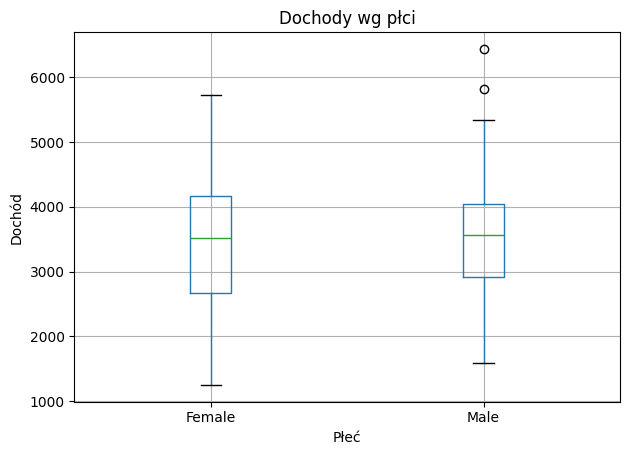

In [39]:
#wykres pudełkowy dochowdów w podziale na płeć
plt.figure(figsize=(8,6))
df.boxplot(column='income',by='gender')
plt.title("Dochody wg płci")
plt.suptitle('')
plt.xlabel('Płeć')
plt.ylabel('Dochód')
plt.tight_layout()
plt.show()